# Επανάληψη scraping

In [1]:
# εισάγουμε τις βιβλιοθήκες
import requests
from bs4 import BeautifulSoup
import pandas as pd

Ας πούμε ότι θέλουμε από την efsyn.gr τους τίτλους των άρθρων των 2 πρώτων σελίδων στην ενότητα ekloges-2023.

Θέλουμε δηλαδή τα άρθρα από τη διεύθυνση "https://www.efsyn.gr/ekloges-2023?page=" και τις σελίδες 0 και 1.

In [2]:
# ορίζουμε το βασικό url
start_url = 'https://www.efsyn.gr/ekloges-2023?page='

Κάνουμε τις δοκιμές μας για μια σελίδα

In [3]:
# κατεβάζουμε τη σελίδα 
response = requests.get(start_url)
doc = BeautifulSoup(response.text, 'html.parser')

Με inspect στη συγκεκριμένη σελίδα της efsyn στο browser, βρισκουμε ότι το κάθε teaser άρθρο βρίσκεται μέσα σε ένα tag ```<article>```.

Και όλα τα teaser articles βρίσκονται μέσα σε ένα div με class: default-teaser triple

In [4]:
# τσεκάρουμε πόσα άρθρα μας φέρνει με τα συγκεκριμένα tags και επιβεβαιώνουμε τον αριθμό μετρώντας τα άρθρα στον browser
len(doc.find('div', {'class': 'default-teaser triple'}).find_all('article'))

12

In [5]:
# κοιτάμε το πρώτο article για να δούμε ποια είναι τα επιμέρους tags για τα δεδομένα που θέλουμε (url, τίτλος, section, summary, time)
doc.find('div', {'class': 'default-teaser triple'}).find_all('article')[0]

<article class="default-teaser__article default-teaser__article"> <figure> <img alt="" height="160" loading="lazy" src="/sites/default/files/styles/default_teaser/public/2023-05/ekloges-psifodeltia_0.jpg?itok=LrmEu11T" typeof="foaf:Image" width="320"> </img></figure> <a class="default-teaser__cat" href="/politiki">ΠΟΛΙΤΙΚΗ</a> <time class="default-teaser__date default-date">23.05.2023, <strong>20:57</strong></time><div class="default-teaser__title">«Ανάβουν» μηχανές για τις 25 Ιουνίου: Όλα τα βήματα μέχρι τις δεύτερες κάλπες</div><div class="default-teaser__summary"> Στο Προεδρικό Μέγαρο το πρωί της Τετάρτης οι πολιτικοί αρχηγοί. Αντίστροφη μέτρηση για την έναρξη διαδικασίας για τη δεύτερη εκλογική αναμέτρηση.</div> <a class="full-link" href="/politiki/390949_anaboyn-mihanes-gia-tis-25-ioynioy-ola-ta-bimata-mehri-tis-deyteres-kalpes">«Ανάβουν» μηχανές για τις 25 Ιουνίου: Όλα τα βήματα μέχρι τις δεύτερες κάλπες</a> </article>

Το link του άρθρου

In [7]:
link = doc.find('div', {'class': 'default-teaser triple'}).find_all('article')[0].find('a', {'class': 'full-link'})['href']
link

'/politiki/390949_anaboyn-mihanes-gia-tis-25-ioynioy-ola-ta-bimata-mehri-tis-deyteres-kalpes'

Παρατηρούμε ότι το link δεν είναι ολόκληρο, οπότε θα πρέπει να προσθέτουμε στην αρχή το ```'https://www.efsyn.gr'```

In [8]:
main_url = 'https://www.efsyn.gr'
link = doc.find('div', {'class': 'default-teaser triple'}).find_all('article')[0].find('a', {'class': 'full-link'})['href']
article_link = main_url + link
article_link

'https://www.efsyn.gr/politiki/390949_anaboyn-mihanes-gia-tis-25-ioynioy-ola-ta-bimata-mehri-tis-deyteres-kalpes'

Ο τίτλος

In [9]:
title = doc.find('div', {'class': 'default-teaser triple'}).find_all('article')[0].find('a', {'class': 'full-link'}).text
title

'«Ανάβουν» μηχανές για τις 25 Ιουνίου: Όλα τα βήματα μέχρι τις δεύτερες κάλπες'

Η ημερομηνία δημοσίευσης

In [10]:
time = doc.find('div', {'class': 'default-teaser triple'}).find_all('article')[0].find('time').text
time

'23.05.2023, 20:57'

Η κατηγορία

In [11]:
section = doc.find('div', {'class': 'default-teaser triple'}).find_all('article')[0].find('a', {'class': 'default-teaser__cat'}).text
section

'ΠΟΛΙΤΙΚΗ'

Η σύνοψη

In [12]:
summary = doc.find('div', {'class': 'default-teaser triple'}).find_all('article')[0].find('div', {'class': 'default-teaser__summary'}).text
summary

' Στο Προεδρικό Μέγαρο το πρωί της Τετάρτης οι πολιτικοί αρχηγοί. Αντίστροφη μέτρηση για την έναρξη διαδικασίας για τη δεύτερη εκλογική αναμέτρηση.'

Φτιάχνουμε τον κώδικα για τη συλλογή των δεδομένων από κάθε άρθρο και τον δοκιμάζουμε για τα άρθρα από τη σελίδα που φέραμε 

In [13]:
# Ορίζουμε το αρχικό url του site
main_url = 'https://www.efsyn.gr'
# Ξεκινάμε με μια άδεια λίστα
stories_list = []
stories = doc.find('div', {'class': 'default-teaser triple'}).find_all('article')
for story in stories:
    # Φτιάχνουμε ένα λεξικό χωρίς τίποτα
    story_dict = {}
    # link
    try:
      link = story.find('a', {'class': 'full-link'})['href'] 
      # ελέγχουμε αν το link ξεκινάει από "http"
      if link.startswith("http"):
        story_dict['url'] = link
      else:
        story_dict['url'] = main_url + link
    except:
      story_dict['url'] = ''
      pass
    # title
    try:
      title = story.find('a', {'class': 'full-link'}).text
      story_dict['title'] = title
    except:
      story_dict['title'] = ''
      pass
    # time
    try:
      time = story.find('time').text
      story_dict['time'] = time
    except:
      story_dict['time'] = ''
      pass
    # section
    try:
      section = story.find('a', {'class': 'default-teaser__category'}).text
      story_dict['section'] = section
    except:
      story_dict['section'] = ''
      pass
    # summary
    try:
      summary = story.find('div', {'class': 'default-teaser__summary'}).text
      story_dict['summary'] = summary
    except:
      story_dict['summary'] = ''
      pass
    # Προσθέτουμε το λεξικό στη λίστα 
    stories_list.append(story_dict)
    
# Δημιουργούμε dataframe από τη λίστα με τα dictionaries
efsyn_df = pd.DataFrame(stories_list)

In [14]:
efsyn_df

url  \
0   https://www.efsyn.gr/politiki/390949_anaboyn-m...   
1   https://www.efsyn.gr/politiki/390945_pos-psifi...   
2   https://www.efsyn.gr/politiki/antipoliteysi/39...   
3   https://www.efsyn.gr/politiki/antipoliteysi/39...   
4   https://www.efsyn.gr/stiles/apopseis/390930_dr...   
5   https://www.efsyn.gr/politiki/390927_epiheiroy...   
6   https://www.efsyn.gr/politiki/kybernisi/390921...   
7   https://www.efsyn.gr/stiles/apopseis/390837_20...   
8   https://www.efsyn.gr/stiles/ypografoyn/390866_...   
9   https://www.efsyn.gr/stiles/apopseis/390886_ka...   
10  https://www.efsyn.gr/stiles/hronografima/39090...   
11  https://www.efsyn.gr/stiles/apopseis/390910_ti...   

                                                title               time  \
0   «Ανάβουν» μηχανές για τις 25 Ιουνίου: Όλα τα β...  23.05.2023, 20:57   
1   Πώς ψήφισαν οι απόδημοι: Ψήφοι και ποσοστά στι...  23.05.2023, 20:12   
2   Επέστρεψε τη διερευνητική εντολή, επιτέθηκε στ...  23.05.2023, 18:47   
3   Την Πέμπτη δίνει τον τόνο για τη νέα εκλογική ...  23.05.2023, 18:00   
4                 «Δρυός πεσούσης πας ανήρ ξυλεύεται»  23.05.2023, 17:29   
5   Επιχειρούν να δικαιολογήσουν τις αποκλίσεις στ...  23.05.2023, 17:10   
6   Δένδιας κατά Άδωνι για την «αλαζονεία» των 180...  23.05.2023, 16:26   
7   Το 2012 ο ΣΥΡΙΖΑ αναδείχτηκε σε αριστερό κόμμα...  23.05.2023, 16:00   
8               Προοδευτική κυβέρνηση; Τι είναι αυτό;  23.05.2023, 16:00   
9                                      Καθαρό δίλημμα  23.05.2023, 16:00   
10                             Και ποίον το νόημα;...  23.05.2023, 16:00   
11                               Τι έγινε, ρε παιδιά;  23.05.2023, 16:00   

   section                                            summary  
0            Στο Προεδρικό Μέγαρο το πρωί της Τετάρτης οι ...  
1            Με διαφορά επικράτησε η Νέα Δημοκρατία και στ...  
2            Σε τροχιά δεύτερων εκλογών μπαίνει η χώρα . Τ...  
3            Με το βλέμμα στην 25η Ιουνίου ο ΣΥΡΙΖΑ. Τα μη...  
4            Θα ’πρεπε ο Αλέξης να θυμάται ότι το 2008 κατ...  
5            Η μία από τις αιτίες που επικαλείται ο ΣΕΔΕΑ ...  
6            Διαφοροποίηση με αιχμές μετά τις μεγαλεπήβολε...  
7            Οι εκλογές της 21ης Mάη είναι καθοριστικές γι...  
8            Την αυτοδυναμία θα διεκδικήσει με δεύτερες εκ...  
9            Το στοίχημα της απλής αναλογικής χάθηκε επειδ...  
10           Περίπου 20% η διαφορά: 40-41% με 20-21%. Δεν ...  
11           Ακόμα δεν ξέρω αν στεναχωριέμαι περισσότερο γ...

Βάζουμε τον κώδικα σε μια for loop για να πάρουμε άρθρα από 2 σελίδες

In [15]:
# Ορίζουμε το αρχικό url του site
main_url = 'https://www.efsyn.gr'
# Ορίζουμε το βασικό url για τις σελίδες που θέλουμε
start_url = 'https://www.efsyn.gr/ekloges-2023?page='
# Φτιάχνουμε μια κενή λίστα για να αποθηκεύουμε τα λεξικά που θα φτιάχνουμε για κάθε άρθρο
stories_list = []

# φτιάχνουμε τη λούπα που ο scraper θα μπαίνει σε καθε μια από τις σελίδες για να φέρνει τα άρθρα
for page_num in range(0, 2):
  url = start_url + str(page_num)
  response = requests.get(url)
  doc = BeautifulSoup(response.text, 'html.parser')
  stories = doc.find('div', {'class': 'default-teaser triple'}).find_all('article')
  for story in stories:
      # Φτιάχνουμε ένα λεξικό χωρίς τίποτα
      story_dict = {}
      # link
      try:
        link = story.find('a', {'class': 'full-link'})['href'] 
        # ελέγχουμε αν το link ξεκινάει από "http"
        if link.startswith("http"):
          story_dict['url'] = link
        else:
          story_dict['url'] = main_url + link
      except:
        story_dict['url'] = ''
        pass
      # title
      try:
        title = story.find('a', {'class': 'full-link'}).text
        story_dict['title'] = title
      except:
        story_dict['title'] = ''
        pass
      # time
      try:
        time = story.find('time').text
        story_dict['time'] = time
      except:
        story_dict['time'] = ''
        pass
      # section
      try:
        section = story.find('a', {'class': 'default-teaser__category'}).text
        story_dict['section'] = section
      except:
        story_dict['section'] = ''
        pass
      # summary
      try:
        summary = story.find('div', {'class': 'default-teaser__summary'}).text
        story_dict['summary'] = summary
      except:
        story_dict['summary'] = ''
        pass
      # Προσθέτουμε το λεξικό στη λίστα 
      stories_list.append(story_dict)
    
# Δημιουργούμε dataframe από τη λίστα με τα dictionaries
efsyn_df = pd.DataFrame(stories_list)

In [16]:
efsyn_df

url  \
0   https://www.efsyn.gr/politiki/390949_anaboyn-m...   
1   https://www.efsyn.gr/politiki/390945_pos-psifi...   
2   https://www.efsyn.gr/politiki/antipoliteysi/39...   
3   https://www.efsyn.gr/politiki/antipoliteysi/39...   
4   https://www.efsyn.gr/stiles/apopseis/390930_dr...   
5   https://www.efsyn.gr/politiki/390927_epiheiroy...   
6   https://www.efsyn.gr/politiki/kybernisi/390921...   
7   https://www.efsyn.gr/stiles/apopseis/390837_20...   
8   https://www.efsyn.gr/stiles/ypografoyn/390866_...   
9   https://www.efsyn.gr/stiles/apopseis/390886_ka...   
10  https://www.efsyn.gr/stiles/hronografima/39090...   
11  https://www.efsyn.gr/stiles/apopseis/390910_ti...   
12  https://www.efsyn.gr/stiles/triti-matia/390916...   
13  https://www.efsyn.gr/politiki/390915_ereyna-ak...   
14  https://www.efsyn.gr/politiki/antipoliteysi/39...   
15  https://www.efsyn.gr/politiki/390902_triplo-oh...   
16  https://www.efsyn.gr/oikonomia/elliniki-oikono...   
17  https://www.efsyn.gr/politiki/paraskinia/39089...   
18  https://www.efsyn.gr/politiki/antipoliteysi/39...   
19  https://www.efsyn.gr/politiki/390876_mplok-ton...   
20  https://www.efsyn.gr/politiki/antipoliteysi/39...   
21  https://www.efsyn.gr/politiki/boyli/390878_ta-...   
22  https://www.efsyn.gr/politiki/antipoliteysi/39...   
23  https://www.efsyn.gr/politiki/antipoliteysi/39...   

                                                title               time  \
0   «Ανάβουν» μηχανές για τις 25 Ιουνίου: Όλα τα β...  23.05.2023, 20:57   
1   Πώς ψήφισαν οι απόδημοι: Ψήφοι και ποσοστά στι...  23.05.2023, 20:12   
2   Επέστρεψε τη διερευνητική εντολή, επιτέθηκε στ...  23.05.2023, 18:47   
3   Την Πέμπτη δίνει τον τόνο για τη νέα εκλογική ...  23.05.2023, 18:00   
4                 «Δρυός πεσούσης πας ανήρ ξυλεύεται»  23.05.2023, 17:29   
5   Επιχειρούν να δικαιολογήσουν τις αποκλίσεις στ...  23.05.2023, 17:10   
6   Δένδιας κατά Άδωνι για την «αλαζονεία» των 180...  23.05.2023, 16:26   
7   Το 2012 ο ΣΥΡΙΖΑ αναδείχτηκε σε αριστερό κόμμα...  23.05.2023, 16:00   
8               Προοδευτική κυβέρνηση; Τι είναι αυτό;  23.05.2023, 16:00   
9                                      Καθαρό δίλημμα  23.05.2023, 16:00   
10                             Και ποίον το νόημα;...  23.05.2023, 16:00   
11                               Τι έγινε, ρε παιδιά;  23.05.2023, 16:00   
12                                        Κατραπακιές  23.05.2023, 16:00   
13  Έρευνα ακτινογραφία για το αποτέλεσμα των εκλογών  23.05.2023, 15:33   
14  «Με πιο ισχυρό ΚΚΕ θα τα βρει σκούρα ο Μητσοτά...  23.05.2023, 15:33   
15  Τριπλό «όχι» στην προσπάθεια σχηματισμού κυβέρ...  23.05.2023, 14:49   
16  Τέσσερα ορόσημα για την οικονομία μέχρι τις εκ...  23.05.2023, 14:15   
17  Τα αποτελέσματα των εθνικών εκλογών και τα «ση...  23.05.2023, 13:51   
18  Μ-Λ ΚΚΕ για τα αποτελέσματα των εκλογών: Καταδ...  23.05.2023, 13:50   
19  Το μπλοκ των «ικανοποιημένων» και η… απιστία τ...  23.05.2023, 13:41   
20          Το απόγευμα στην ΠτΔ ο Νίκος Ανδρουλάκης   23.05.2023, 13:14   
21  Τα αδέρφια Βελόπουλοι στη Βουλή με... διαφορετ...  23.05.2023, 13:04   
22         ΟΚΔΕ: Εκτίμηση του εκλογικού αποτελέσματος  23.05.2023, 12:52   
23  Τι θα κάνει το ΠΑΣΟΚ-ΚΙΝ.ΑΛΛ με τη διερευνητικ...  23.05.2023, 12:40   

   section                                            summary  
0            Στο Προεδρικό Μέγαρο το πρωί της Τετάρτης οι ...  
1            Με διαφορά επικράτησε η Νέα Δημοκρατία και στ...  
2            Σε τροχιά δεύτερων εκλογών μπαίνει η χώρα . Τ...  
3            Με το βλέμμα στην 25η Ιουνίου ο ΣΥΡΙΖΑ. Τα μη...  
4            Θα ’πρεπε ο Αλέξης να θυμάται ότι το 2008 κατ...  
5            Η μία από τις αιτίες που επικαλείται ο ΣΕΔΕΑ ...  
6            Διαφοροποίηση με αιχμές μετά τις μεγαλεπήβολε...  
7            Οι εκλογές της 21ης Mάη είναι καθοριστικές γι...  
8            Την αυτοδυναμία θα διεκδικήσει με δεύτερες εκ...  
9            Το στοίχημα της απλής αναλογικής χάθηκε επειδ...  
10           Περίπο

# Διανυσματοποίηση Εγγράφων/κειμένων (Vectorization)

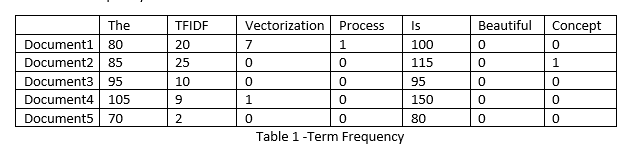

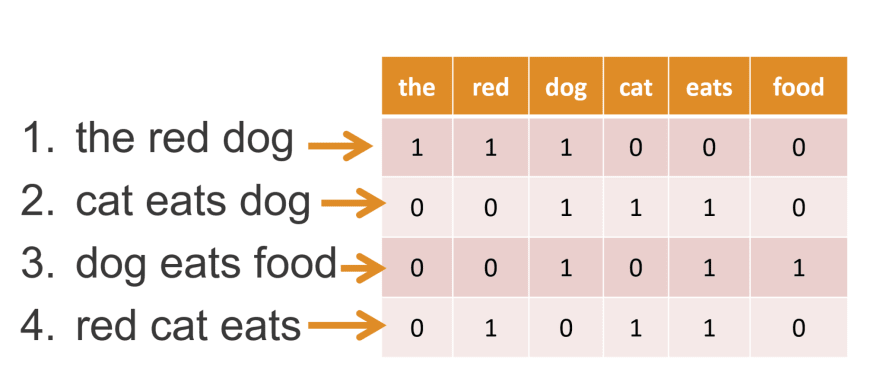

In [17]:
import numpy as np 

θα χρησιμοποιήσουμε τα παραπάνω άρθρα που μαζέψαμε από την efsyn

In [18]:
efsyn_df.head(1)

url  \
0  https://www.efsyn.gr/politiki/390949_anaboyn-m...   

                                               title               time  \
0  «Ανάβουν» μηχανές για τις 25 Ιουνίου: Όλα τα β...  23.05.2023, 20:57   

  section                                            summary  
0           Στο Προεδρικό Μέγαρο το πρωί της Τετάρτης οι ...

Ας ενώσουμε τον τίτλο με το summary

In [21]:
efsyn_df['text'] = efsyn_df[['title', 'summary']].agg('.'.join, axis=1)
efsyn_df.loc[0, 'text']

'«Ανάβουν» μηχανές για τις 25 Ιουνίου: Όλα τα βήματα μέχρι τις δεύτερες κάλπες. Στο Προεδρικό Μέγαρο το πρωί της Τετάρτης οι πολιτικοί αρχηγοί. Αντίστροφη μέτρηση για την έναρξη διαδικασίας για τη δεύτερη εκλογική αναμέτρηση.'

Ας μετατρέψουμε το time σε datetime

In [22]:
efsyn_df.dtypes

url        object
title      object
time       object
section    object
summary    object
text       object
dtype: object

In [23]:
efsyn_df.loc[0, 'time']

'23.05.2023, 20:57'

Τους κωδικούς για το format θα τους βρείτε εδώ: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [24]:
efsyn_df['date'] = pd.to_datetime(efsyn_df['time'], format='%d.%m.%Y, %H:%M')

In [31]:
efsyn_df.dtypes

url                object
title              object
time               object
section            object
summary            object
text               object
date       datetime64[ns]
dtype: object

In [25]:
efsyn_df.head(1)

url  \
0  https://www.efsyn.gr/politiki/390949_anaboyn-m...   

                                               title               time  \
0  «Ανάβουν» μηχανές για τις 25 Ιουνίου: Όλα τα β...  23.05.2023, 20:57   

  section                                            summary  \
0           Στο Προεδρικό Μέγαρο το πρωί της Τετάρτης οι ...   

                                                text                date  
0  «Ανάβουν» μηχανές για τις 25 Ιουνίου: Όλα τα β... 2023-05-23 20:57:00

Ας φτιάξουμε ένα μικρότερο dataframe...

In [26]:
short_efsyn_df = efsyn_df[['date','text' ]]

In [27]:
short_efsyn_df.head()

date                                               text
0 2023-05-23 20:57:00  «Ανάβουν» μηχανές για τις 25 Ιουνίου: Όλα τα β...
1 2023-05-23 20:12:00  Πώς ψήφισαν οι απόδημοι: Ψήφοι και ποσοστά στι...
2 2023-05-23 18:47:00  Επέστρεψε τη διερευνητική εντολή, επιτέθηκε στ...
3 2023-05-23 18:00:00  Την Πέμπτη δίνει τον τόνο για τη νέα εκλογική ...
4 2023-05-23 17:29:00  «Δρυός πεσούσης πας ανήρ ξυλεύεται». Θα ’πρεπε...

In [28]:
short_efsyn_df.tail()

date                                               text
19 2023-05-23 13:41:00  Το μπλοκ των «ικανοποιημένων» και η… απιστία τ...
20 2023-05-23 13:14:00  Το απόγευμα στην ΠτΔ ο Νίκος Ανδρουλάκης . Με ...
21 2023-05-23 13:04:00  Τα αδέρφια Βελόπουλοι στη Βουλή με... διαφορετ...
22 2023-05-23 12:52:00  ΟΚΔΕ: Εκτίμηση του εκλογικού αποτελέσματος. «Μ...
23 2023-05-23 12:40:00  Τι θα κάνει το ΠΑΣΟΚ-ΚΙΝ.ΑΛΛ με τη διερευνητικ...

Ας φτιάξουμε στήλες για το έτος, το μήνα, την ημέρα και την ώρα (αυτό είναι εφικτό γιατί η ημερομηνία είναι datetime)

In [41]:
short_efsyn_df['year'] = pd.DatetimeIndex(short_efsyn_df['date']).year
short_efsyn_df['month'] = pd.DatetimeIndex(short_efsyn_df['date']).month
short_efsyn_df['day'] = pd.DatetimeIndex(short_efsyn_df['date']).day
short_efsyn_df['hour'] = pd.DatetimeIndex(short_efsyn_df['date']).hour


<ipython-input-41-68621ae7f14d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_efsyn_df['year'] = pd.DatetimeIndex(short_efsyn_df['date']).year
<ipython-input-41-68621ae7f14d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_efsyn_df['month'] = pd.DatetimeIndex(short_efsyn_df['date']).month
<ipython-input-41-68621ae7f14d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [43]:
short_efsyn_df.head()

date                                               text  \
0 2023-05-23 20:57:00  «Ανάβουν» μηχανές για τις 25 Ιουνίου: Όλα τα β...   
1 2023-05-23 20:12:00  Πώς ψήφισαν οι απόδημοι: Ψήφοι και ποσοστά στι...   
2 2023-05-23 18:47:00  Επέστρεψε τη διερευνητική εντολή, επιτέθηκε στ...   
3 2023-05-23 18:00:00  Την Πέμπτη δίνει τον τόνο για τη νέα εκλογική ...   
4 2023-05-23 17:29:00  «Δρυός πεσούσης πας ανήρ ξυλεύεται». Θα ’πρεπε...   

   year  month  day  hour  
0  2023      5   23    20  
1  2023      5   23    20  
2  2023      5   23    18  
3  2023      5   23    18  
4  2023      5   23    17

Ας δούμε πόσα άρθρα έχουν δημοσιευτεί κάθε ώρα

<Axes: >

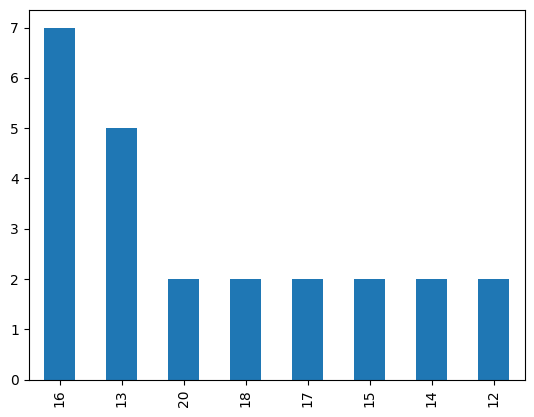

In [46]:
short_efsyn_df['hour'].value_counts().plot(kind='bar')

Ας δούμε ποιες είναι οι συχνότερες λέξεις στα κείμενα

In [47]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [51]:
short_efsyn_df[short_efsyn_df['day']==23]['text']

0     «Ανάβουν» μηχανές για τις 25 Ιουνίου: Όλα τα β...
1     Πώς ψήφισαν οι απόδημοι: Ψήφοι και ποσοστά στι...
2     Επέστρεψε τη διερευνητική εντολή, επιτέθηκε στ...
3     Την Πέμπτη δίνει τον τόνο για τη νέα εκλογική ...
4     «Δρυός πεσούσης πας ανήρ ξυλεύεται». Θα ’πρεπε...
5     Επιχειρούν να δικαιολογήσουν τις αποκλίσεις στ...
6     Δένδιας κατά Άδωνι για την «αλαζονεία» των 180...
7     Το 2012 ο ΣΥΡΙΖΑ αναδείχτηκε σε αριστερό κόμμα...
8     Προοδευτική κυβέρνηση; Τι είναι αυτό;. Την αυτ...
9     Καθαρό δίλημμα. Το στοίχημα της απλής αναλογικ...
10    Και ποίον το νόημα;.... Περίπου 20% η διαφορά:...
11    Τι έγινε, ρε παιδιά;. Ακόμα δεν ξέρω αν στεναχ...
12    Κατραπακιές. Πρώτη αντίδραση στην κατραπακιά ε...
13    Έρευνα ακτινογραφία για το αποτέλεσμα των εκλο...
14    «Με πιο ισχυρό ΚΚΕ θα τα βρει σκούρα ο Μητσοτά...
15    Τριπλό «όχι» στην προσπάθεια σχηματισμού κυβέρ...
16    Τέσσερα ορόσημα για την οικονομία μέχρι τις εκ...
17    Τα αποτελέσματα των εθνικών εκλογών και τα

In [ ]:
# Ισως καποτε χρειαστεί να αφαιρέσουμε τους τόνους.....
#text = short_efsyn_df['text'].str.replace('ά','α').str.replace("έ", "ε").str.replace('ή','η').str.replace('ί','ι').str.replace('ό','ο').str.replace('ύ','υ').str.replace('ώ','ω')


Ας ενώσουμε όλα τα κείμενα της 23ης Μαΐου

In [52]:
text = short_efsyn_df[short_efsyn_df['day']==23]['text'].str.cat(sep = ' ')

In [53]:
text

'«Ανάβουν» μηχανές για τις 25 Ιουνίου: Όλα τα βήματα μέχρι τις δεύτερες κάλπες. Στο Προεδρικό Μέγαρο το πρωί της Τετάρτης οι πολιτικοί αρχηγοί. Αντίστροφη μέτρηση για την έναρξη διαδικασίας για τη δεύτερη εκλογική αναμέτρηση. Πώς ψήφισαν οι απόδημοι: Ψήφοι και ποσοστά στις πέντε ηπείρους. Με διαφορά επικράτησε η Νέα Δημοκρατία και στις κάλπες που στήθηκαν στο εξωτερικό, με το ΜέΡΑ25 να αποτελεί την έκπληξη, καθώς αναδείχθηκε τρίτο κόμμα, ενώ στην Αυστραλία κατέλαβε τη δεύτερη θέση. Επέστρεψε τη διερευνητική εντολή, επιτέθηκε στον ΣΥΡΙΖΑ. Σε τροχιά δεύτερων εκλογών μπαίνει η χώρα . Τα κομματικά επιτελεία έχουν ήδη κυκλώσει την 25η Ιουνίου ως την ημέρα για τις κάλπες. Την Πέμπτη δίνει τον τόνο για τη νέα εκλογική μάχη. Με το βλέμμα στην 25η Ιουνίου ο ΣΥΡΙΖΑ. Τα μηνύματα Τσίπρα και οι διεργασίες στην Κεντρική Επιτροπή για τις δεύτερες κάλπες. «Δρυός πεσούσης πας ανήρ ξυλεύεται». Θα ’πρεπε ο Αλέξης να θυμάται ότι το 2008 κατάφερε να κερδίσει τον ΣΥΡΙΖΑ, αλλάζοντας την ηγεμονική αντιμετώπισ

Ας δούμε τι περιέχει η λίστα των STOPWORDS

In [54]:
list(STOPWORDS)[0:20]

["doesn't",
 'out',
 'down',
 'it',
 'those',
 'up',
 'very',
 'you',
 "i'll",
 'while',
 'yourself',
 'too',
 "couldn't",
 'whom',
 'than',
 'their',
 'other',
 "you're",
 "it's",
 'him']

Ας φτιάξουμε ένα συννεφόλεξο με τις συχνότερες λέξεις

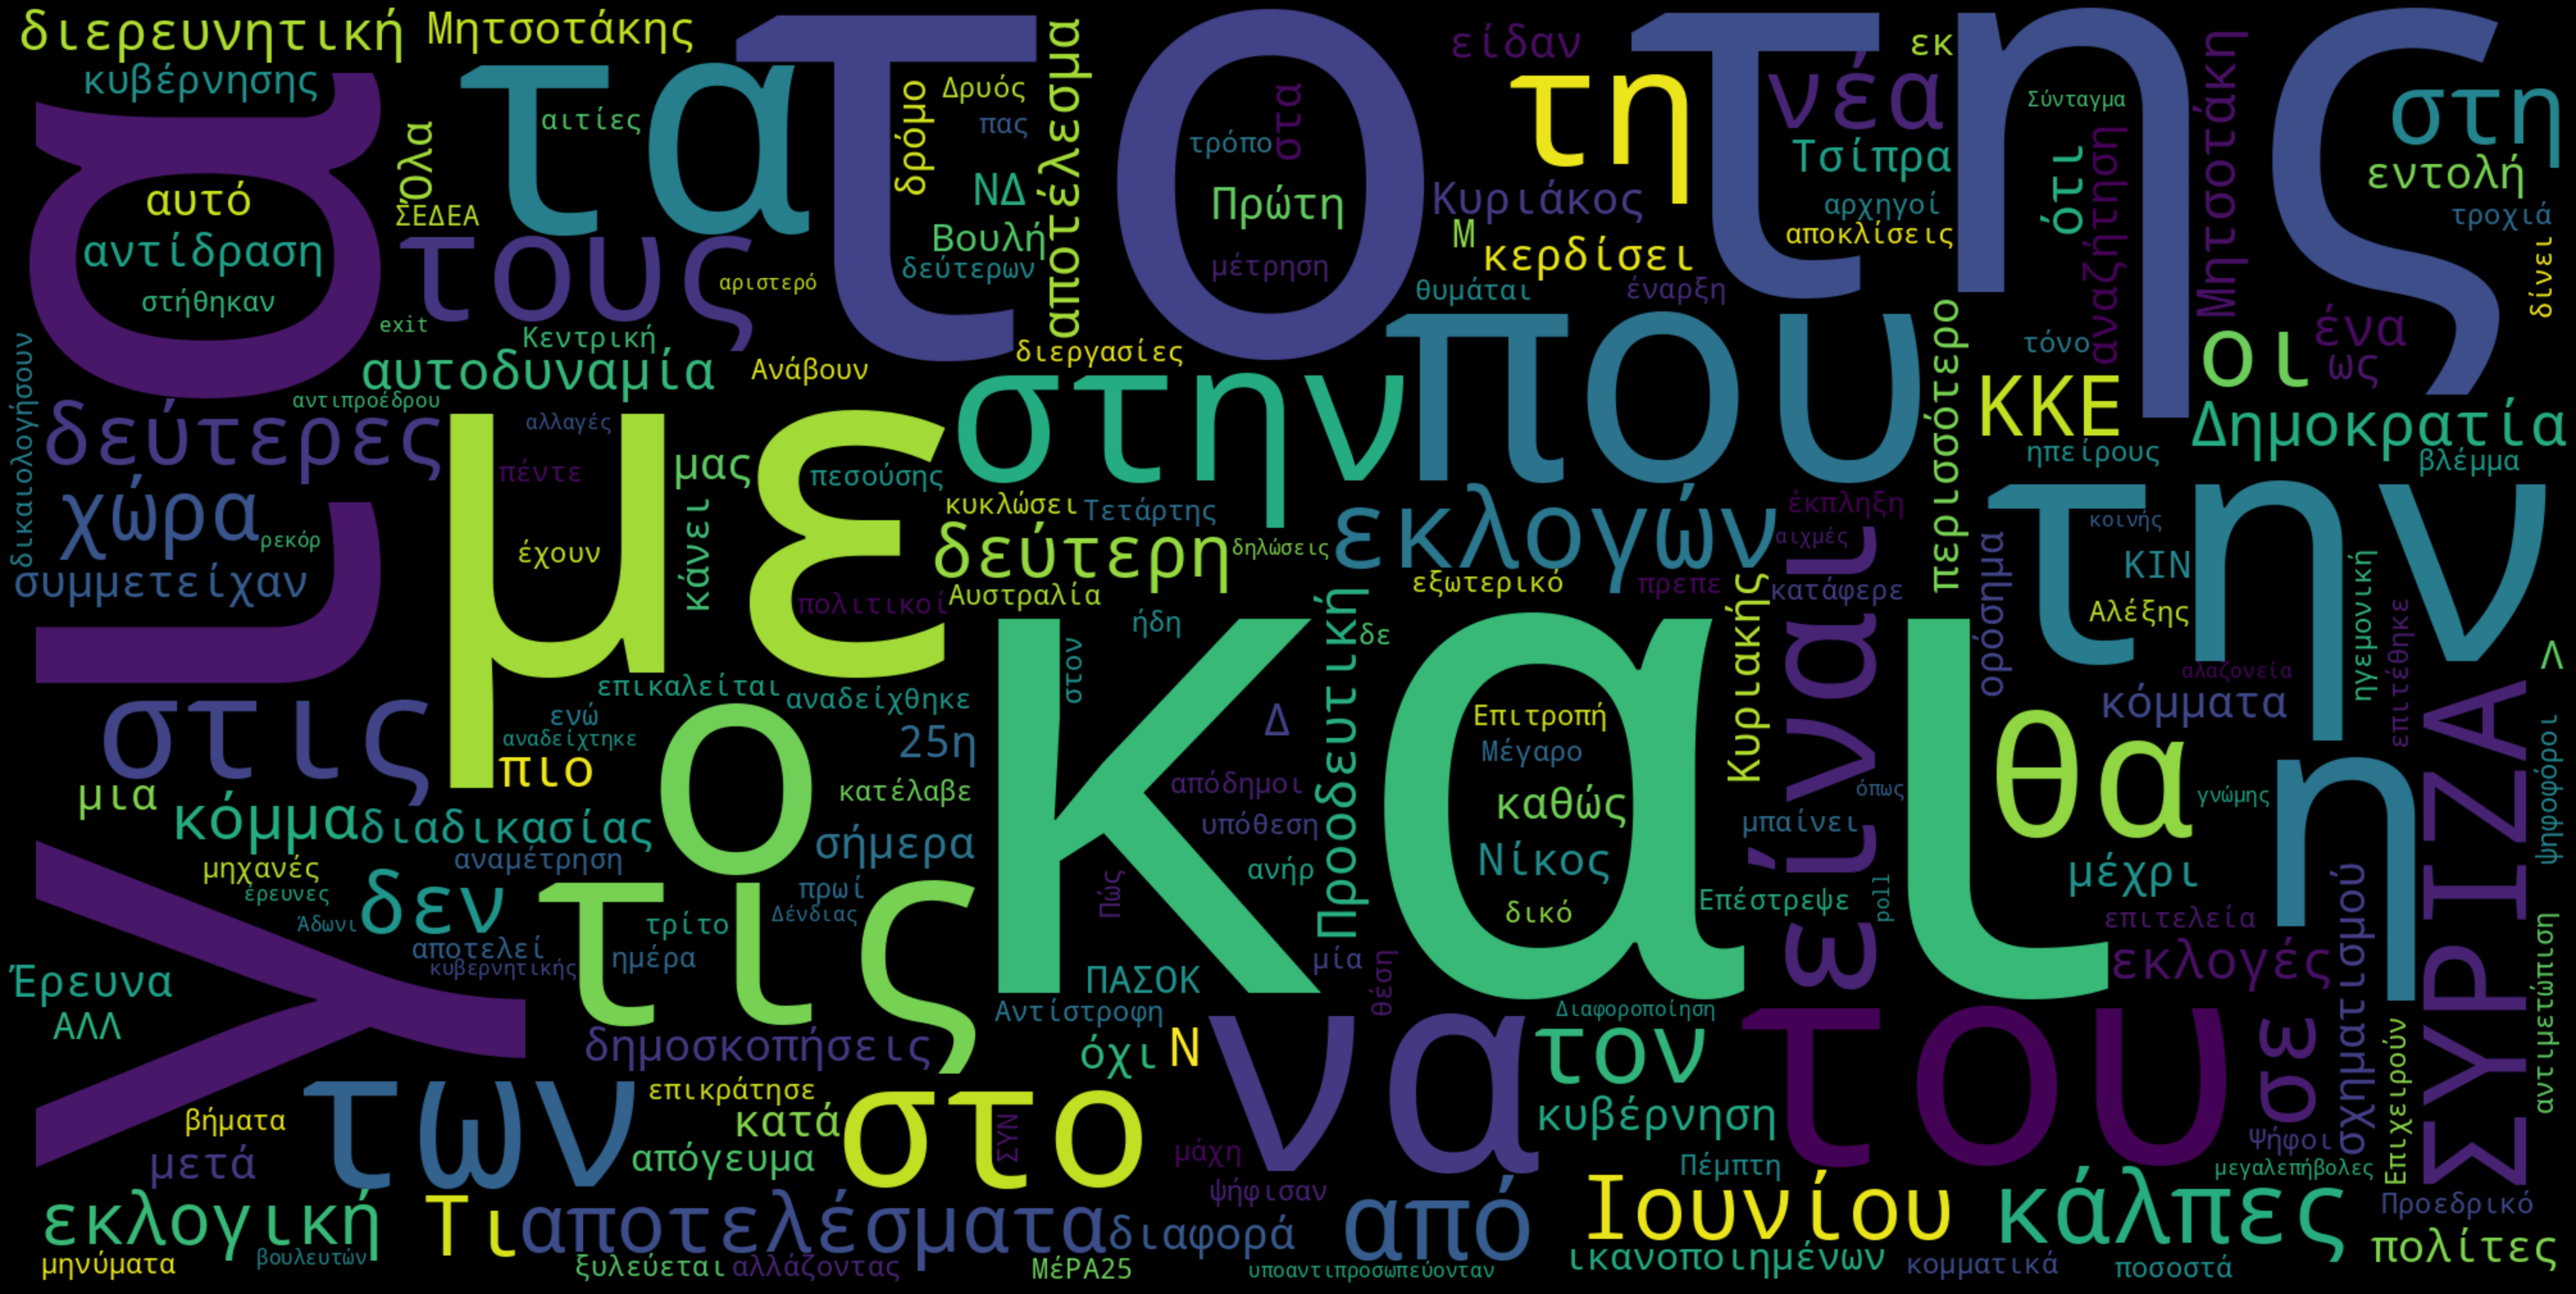

In [55]:
wordcloud = WordCloud(
#   stopwords = STOPWORDS,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Ας ψάξουμε τα Ελληνικά stopwords.....

In [56]:
import spacy

In [ ]:
#!python -m spacy download el_core_news_sm

# Αν η παρακάτω εντολή δεν δουλεύει, κάνουμε Runtime ->  Restart Runtime, για να δει τις αλλαγές από το download...

In [58]:
nlp = spacy.load('el_core_news_sm')

In [59]:
list(nlp.Defaults.stop_words)[0:20]

['οποιδήποτε',
 'κανείς',
 'μονομιάς',
 'λοιπόν',
 'οποιασδήποτε',
 'καθετί',
 'όπου',
 'συχνή',
 'οποιανδήποτε',
 'πρόκειται',
 'στους',
 'αυτός',
 'τρεις',
 'δικά',
 'εφεξής',
 'πούθε',
 'μεσώ',
 'τέτοιας',
 'εν',
 'ώστε']

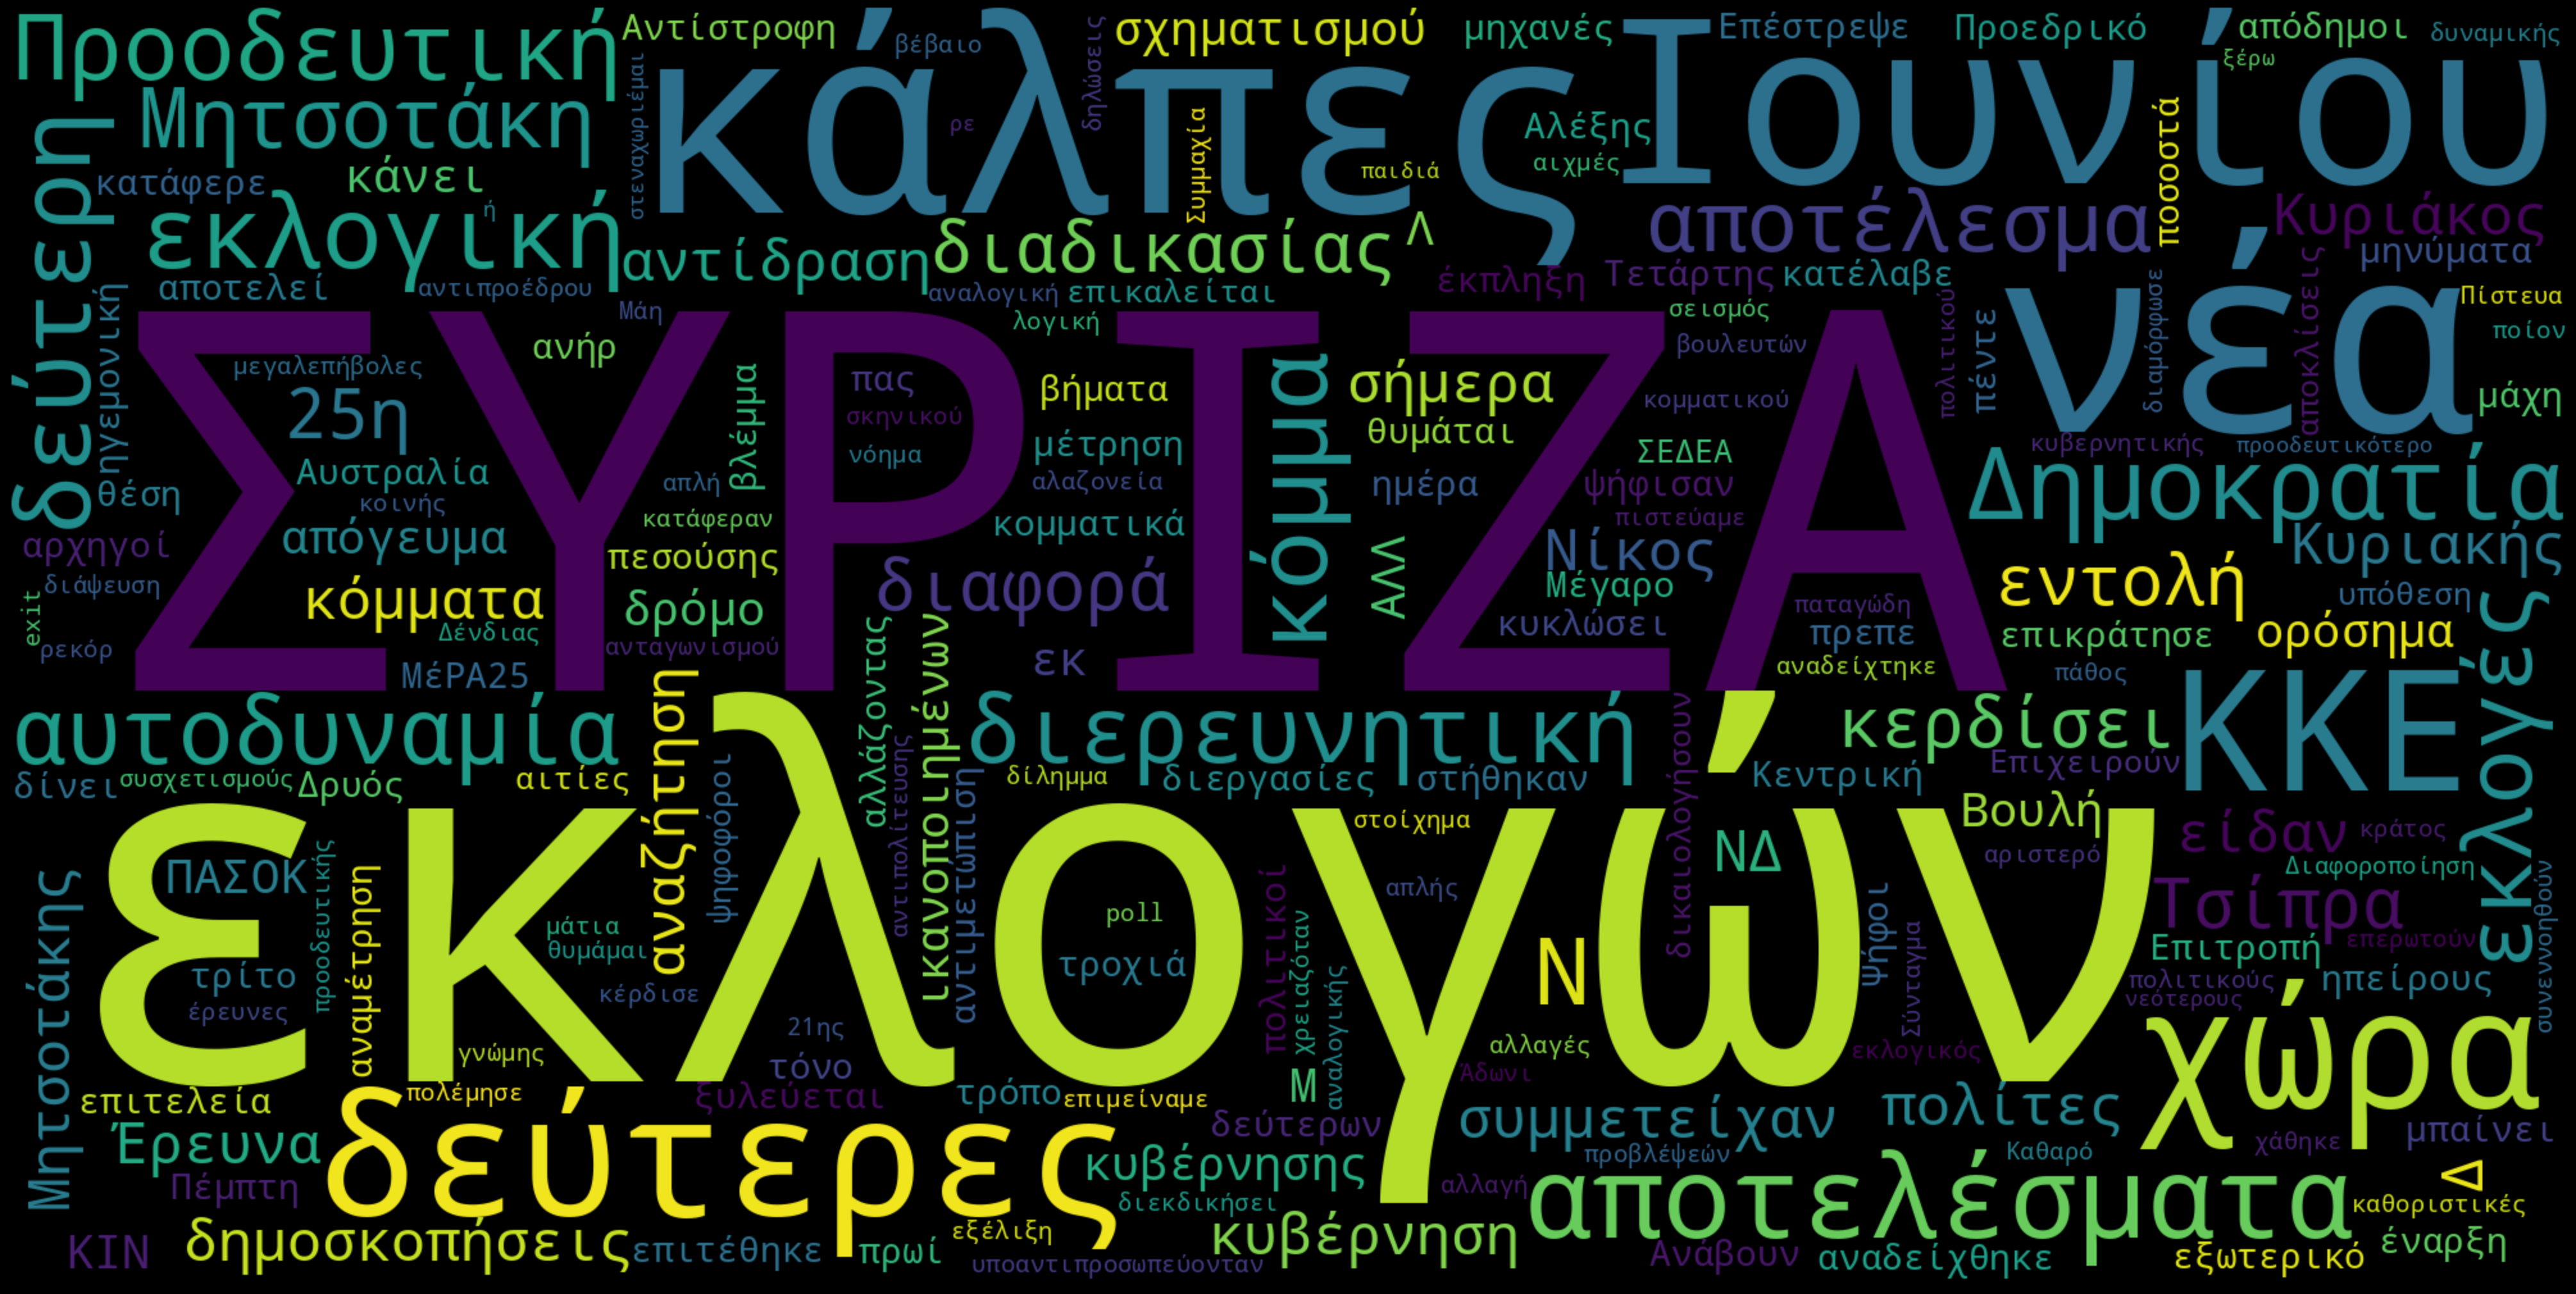

In [60]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Ας βρούμε για καθε λέξη που βρίσκεται σε διαφορετικές πτώσεις στην ονομαστική, και τα ρήματα στο 1ο πρόσωπο...

In [61]:
doc = nlp(short_efsyn_df['text'][1])

In [62]:
for token in doc:
    print(token, token.lemma_)

Πώς Πώς
ψήφισαν ψήφισαν
οι ο
απόδημοι απόδημος
: :
Ψήφοι Ψήφοι
και και
ποσοστά ποσοστό
στις σε ο
πέντε πέντε
ηπείρους ηπείρος
. .
Με με
διαφορά διαφορά
επικράτησε επικρατώ
η ο
Νέα νέος
Δημοκρατία δημοκρατία
και και
στις σε ο
κάλπες κάλπος
που που
στήθηκαν στήθηκαν
στο σε ο
εξωτερικό εξωτερικό
, ,
με με
το ο
ΜέΡΑ25 ΜέΡΑ25
να να
αποτελεί αποτελώ
την ο
έκπληξη έκπληξη
, ,
καθώς καθώς
αναδείχθηκε αναδείχθηκε
τρίτο τρίτος
κόμμα κόμμα
, ,
ενώ ενώ
στην σε ο
Αυστραλία Αυστραλία
κατέλαβε καταλαμβάνω
τη ο
δεύτερη δεύτερος
θέση θέση
. .


In [63]:
' '.join(token.lemma_ for token in doc)

'Πώς ψήφισαν ο απόδημος : Ψήφοι και ποσοστό σε ο πέντε ηπείρος . με διαφορά επικρατώ ο νέος δημοκρατία και σε ο κάλπος που στήθηκαν σε ο εξωτερικό , με ο ΜέΡΑ25 να αποτελώ ο έκπληξη , καθώς αναδείχθηκε τρίτος κόμμα , ενώ σε ο Αυστραλία καταλαμβάνω ο δεύτερος θέση .'

In [64]:
text

'«Ανάβουν» μηχανές για τις 25 Ιουνίου: Όλα τα βήματα μέχρι τις δεύτερες κάλπες. Στο Προεδρικό Μέγαρο το πρωί της Τετάρτης οι πολιτικοί αρχηγοί. Αντίστροφη μέτρηση για την έναρξη διαδικασίας για τη δεύτερη εκλογική αναμέτρηση. Πώς ψήφισαν οι απόδημοι: Ψήφοι και ποσοστά στις πέντε ηπείρους. Με διαφορά επικράτησε η Νέα Δημοκρατία και στις κάλπες που στήθηκαν στο εξωτερικό, με το ΜέΡΑ25 να αποτελεί την έκπληξη, καθώς αναδείχθηκε τρίτο κόμμα, ενώ στην Αυστραλία κατέλαβε τη δεύτερη θέση. Επέστρεψε τη διερευνητική εντολή, επιτέθηκε στον ΣΥΡΙΖΑ. Σε τροχιά δεύτερων εκλογών μπαίνει η χώρα . Τα κομματικά επιτελεία έχουν ήδη κυκλώσει την 25η Ιουνίου ως την ημέρα για τις κάλπες. Την Πέμπτη δίνει τον τόνο για τη νέα εκλογική μάχη. Με το βλέμμα στην 25η Ιουνίου ο ΣΥΡΙΖΑ. Τα μηνύματα Τσίπρα και οι διεργασίες στην Κεντρική Επιτροπή για τις δεύτερες κάλπες. «Δρυός πεσούσης πας ανήρ ξυλεύεται». Θα ’πρεπε ο Αλέξης να θυμάται ότι το 2008 κατάφερε να κερδίσει τον ΣΥΡΙΖΑ, αλλάζοντας την ηγεμονική αντιμετώπισ

In [65]:
full_doc = nlp(text)

In [66]:
clear_text = ' '.join(token.lemma_ for token in full_doc)

In [68]:
clear_text[200:400]

'ογικός αναμέτρηση . Πώς ψήφισαν ο απόδημος : Ψήφοι και ποσοστό σε ο πέντε ηπείρος . με διαφορά επικρατώ ο νέος δημοκρατία και σε ο κάλπος που στήθηκαν σε ο εξωτερικό , με ο ΜέΡΑ25 να αποτελώ ο έκπληξη'

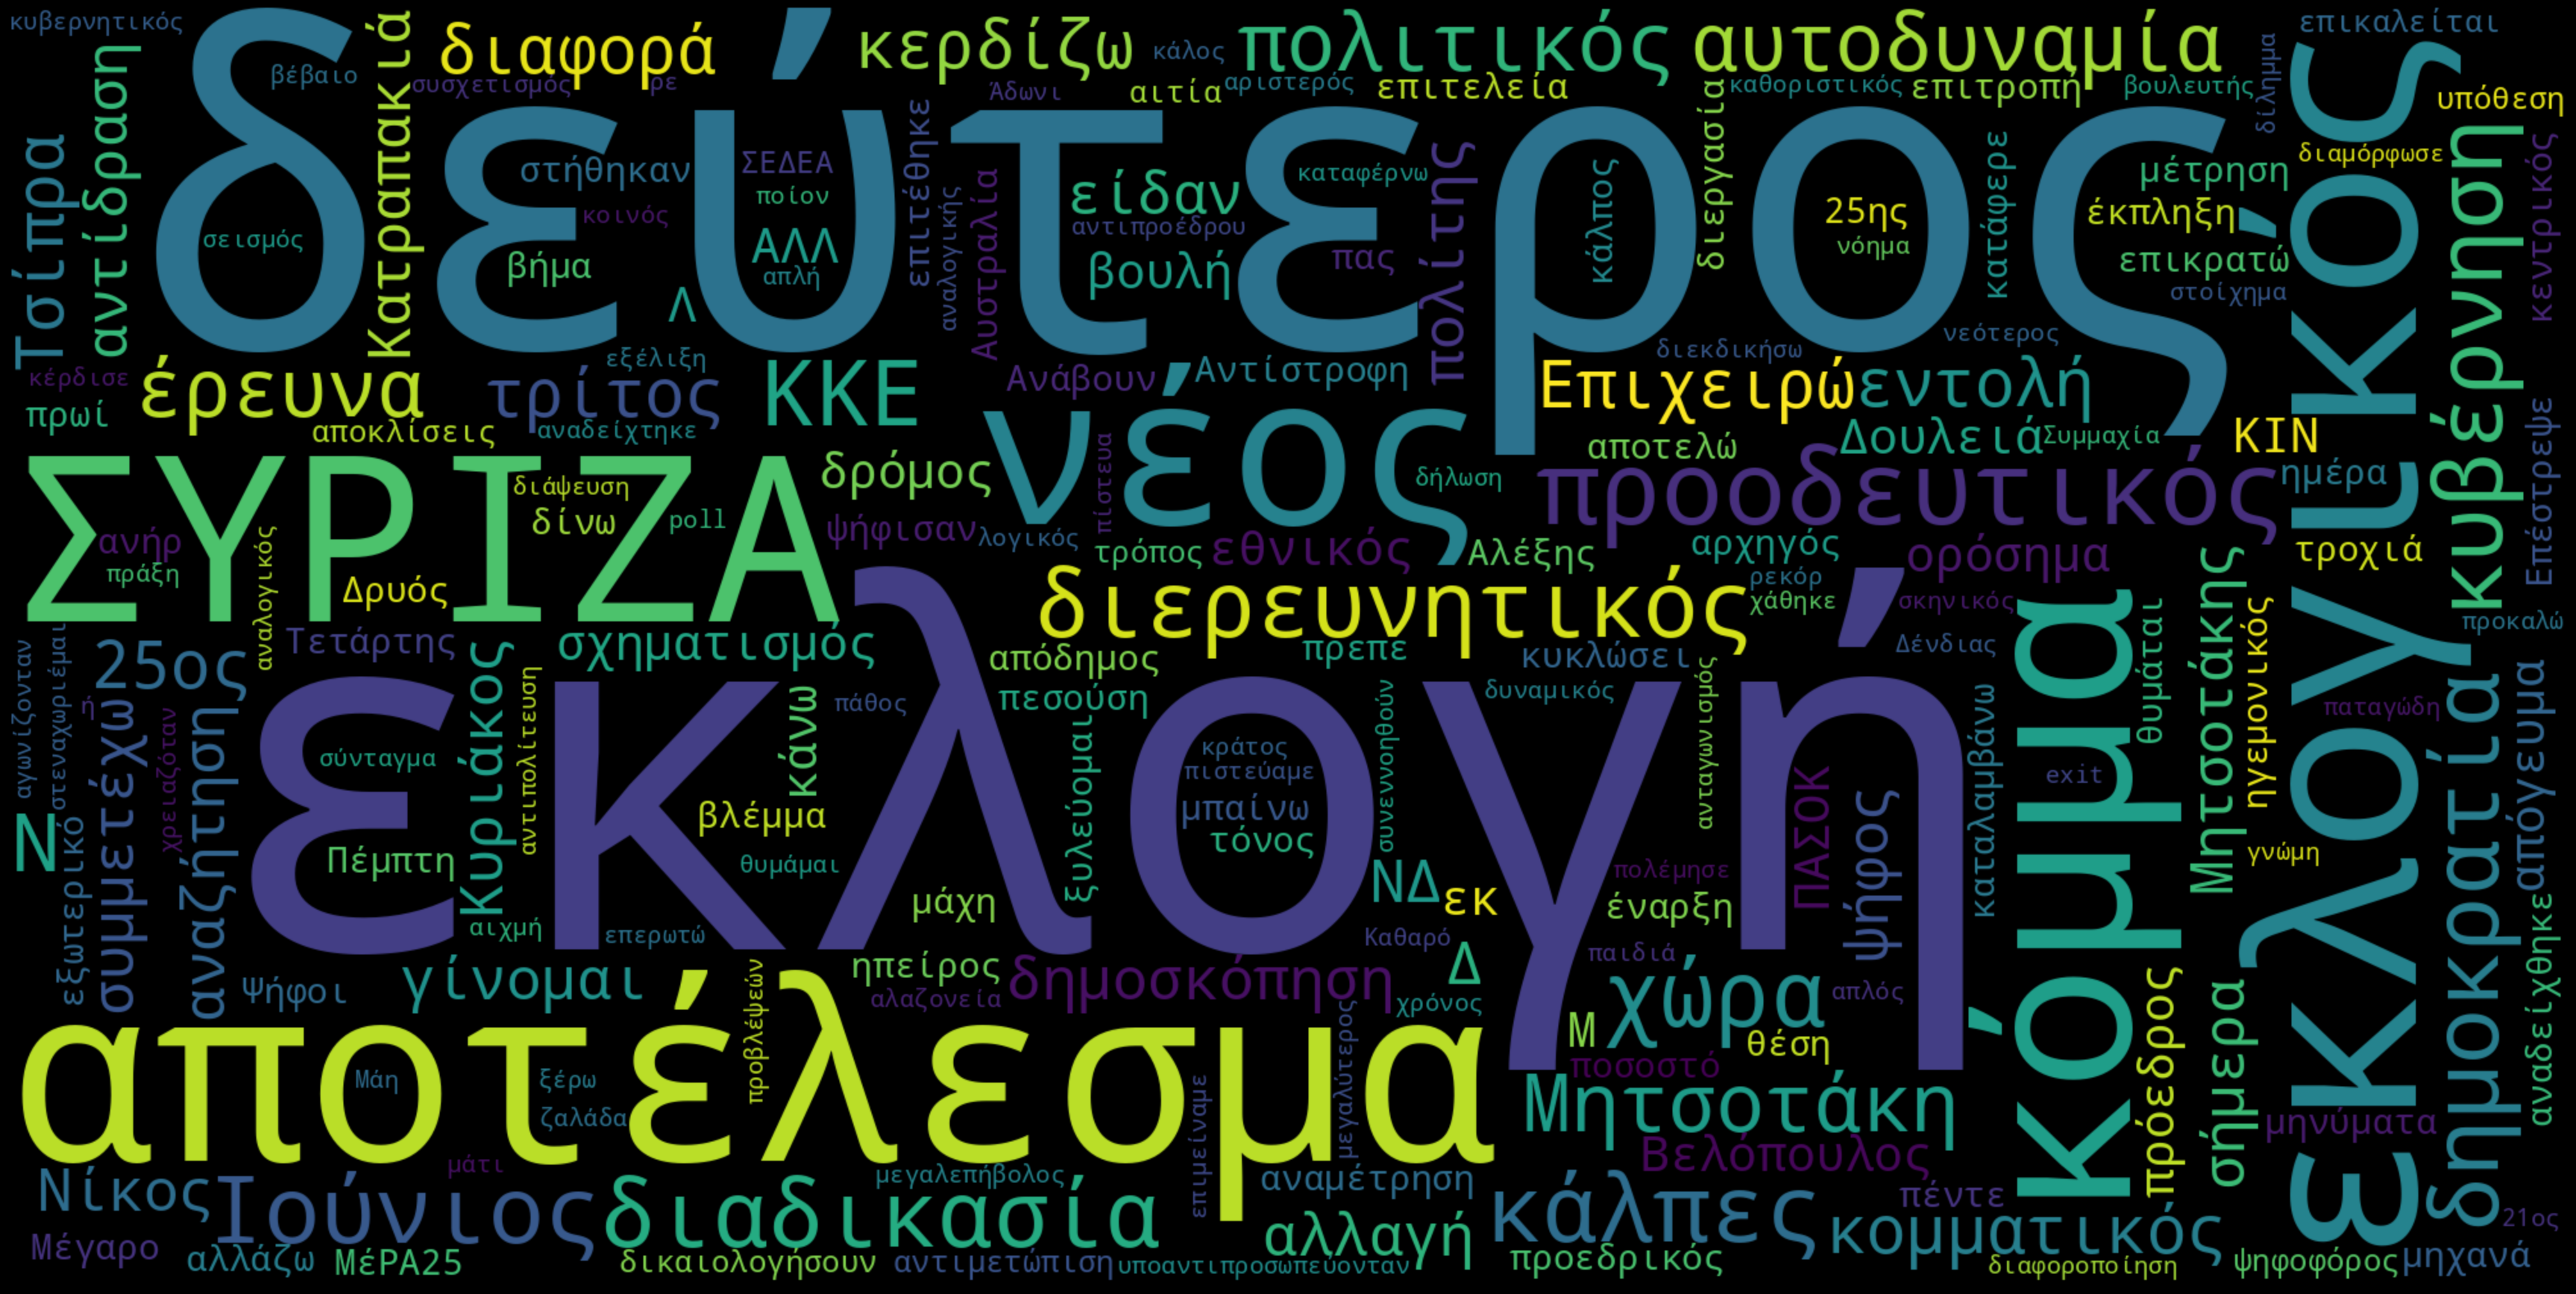

In [67]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(clear_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Vectorization starts here......

In [69]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [70]:
count_vector = cv.fit_transform(short_efsyn_df['text'])

In [71]:
count_vector.shape

(24, 432)

In [72]:
# cv.get_feature_names()

results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out()) 

results.head()


180  20  2008  2012  2019  21  21ης  25  25η  25ης  ...  ψήφους  ψηφοφόροι  \
0    0   0     0     0     0   0     0   1    0     0  ...       0          0   
1    0   0     0     0     0   0     0   0    0     0  ...       0          0   
2    0   0     0     0     0   0     0   0    1     0  ...       0          0   
3    0   0     0     0     0   0     0   0    1     0  ...       0          0   
4    0   0     1     0     0   0     0   0    0     0  ...       0          0   

   ως  όλα  όπως  όσο  όσων  ότι  όχι  όψει  
0   0    1     0    0     0    0    0     0  
1   0    0     0    0     0    0    0     0  
2   1    0     0    0     0    0    0     0  
3   0    0     0    0     0    0    0     0  
4   0    0     0    0     0    1    0     0  

[5 rows x 432 columns]

In [79]:
#cv.vocabulary_

AttributeError: ignored

In [83]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words)#, min_df=0.01, max_df=0.95)

In [84]:
count_vector = cv.fit_transform(short_efsyn_df['text'])

InvalidParameterError: ignored

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out()) 

results.head()


NotFittedError: ignored

In [ ]:
from html import unescape
def my_tokenizer(doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [ ]:
 cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(short_efsyn_df['text'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out()) 
 results.head()


InvalidParameterError: ignored

In [ ]:
 cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20) #, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(short_efsyn_df['text'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out()) 
 results.head()




InvalidParameterError: ignored

In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(short_efsyn_df['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out()) 
results.head()


In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) ) #token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(short_efsyn_df['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out()) 
results.head()

In [ ]:
results.sum(axis =0).sort_values(ascending = False)

In [ ]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()   


In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
 #                    token_pattern = '(\\bκ[οω]ρ[οω]ν[α-ωά-ώ]+\\b') )\| (\\bκυβ[α-ωά-ώ]\\b) #, tokenizer=my_tokenizer)
                     token_pattern = '\\bcov[a-z0-9-_]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(short_efsyn_df['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out()) 
results.head()

In [ ]:
results.sum(axis =0).sort_values(ascending = False)

In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
                     vocabulary = ['covid19', 'κυβέρνηση']) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(short_efsyn_df['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out()) 
results.head()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(short_efsyn_df['text'])  #finds the tfidf score with normalization


In [ ]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out()) 
results.head()

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))  #here the first element of tfidf_matrix_train is matched with other three elements

In [ ]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train))  #here the first element of tfidf_matrix_train is matched with other three elements

In [ ]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

In [ ]:
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar')

In [ ]:
short_efsyn_df['text'].loc[3]

In [ ]:
short_efsyn_df['text'].loc[2823]